In [ ]:
pip install ucimlrepo

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
energy_efficiency = fetch_ucirepo(id=242)

In [ ]:
X = energy_efficiency.data.features
X.columns = [
    'Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
    'Overall Height', 'Orientation', 'Glazing Area', 'Glazing Area Distribution'
]
feature_names = X.columns
y = energy_efficiency.data.targets.iloc[:, 0]

In [ ]:
print("Kompletność danych:")
print(X.isnull().sum())

Kompletność danych:
Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
dtype: int64


In [ ]:
print("\nOpis danych:")
print(X.describe())


Opis danych:
       Relative Compactness  Surface Area   Wall Area   Roof Area  \
count            768.000000    768.000000  768.000000  768.000000   
mean               0.764167    671.708333  318.500000  176.604167   
std                0.105777     88.086116   43.626481   45.165950   
min                0.620000    514.500000  245.000000  110.250000   
25%                0.682500    606.375000  294.000000  140.875000   
50%                0.750000    673.750000  318.500000  183.750000   
75%                0.830000    741.125000  343.000000  220.500000   
max                0.980000    808.500000  416.500000  220.500000   

       Overall Height  Orientation  Glazing Area  Glazing Area Distribution  
count       768.00000   768.000000    768.000000                  768.00000  
mean          5.25000     3.500000      0.234375                    2.81250  
std           1.75114     1.118763      0.133221                    1.55096  
min           3.50000     2.000000      0.000000    


Macierz korelacji przed standaryzacją:


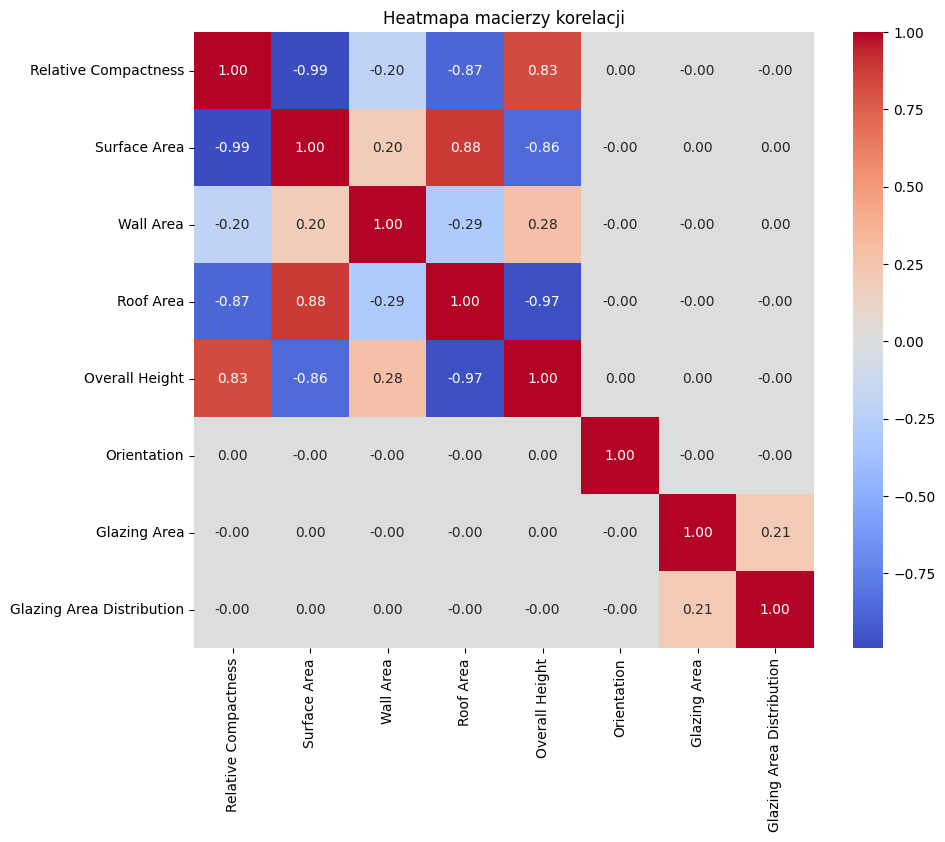

In [ ]:
print("\nMacierz korelacji przed standaryzacją:")
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmapa macierzy korelacji')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("\nWyniki drzewa decyzyjnego:")
print(f"MSE: {mean_squared_error(y_test, y_pred_dt):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_dt):.2f}")



Wyniki drzewa decyzyjnego:
MSE: 0.39
R2 Score: 1.00


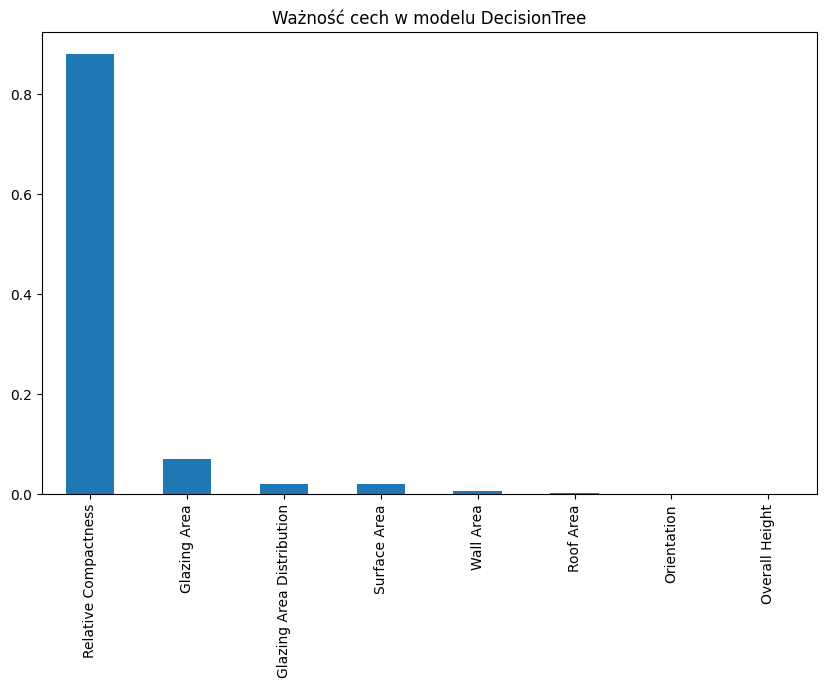

In [ ]:
# Ważność cech w modelu DecisionTree
feature_importances = pd.Series(dt_model.feature_importances_, index=feature_names)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title("Ważność cech w modelu DecisionTree")
plt.show()


In [ ]:
kn_model = KNeighborsRegressor()
kn_model.fit(X_train, y_train)
y_pred_kn = kn_model.predict(X_test)
print("\nWyniki K-Neighbors Regressor:")
print(f"MSE: {mean_squared_error(y_test, y_pred_kn):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_kn):.2f}")



Wyniki K-Neighbors Regressor:
MSE: 5.30
R2 Score: 0.95


In [ ]:
# Model bazowy MLP
mlp_model_base = MLPRegressor(random_state=42)
mlp_model_base.fit(X_train, y_train)
y_pred_mlp_base = mlp_model_base.predict(X_test)

print("\nWyniki MLP (model bazowy):")
print(f"MSE: {mean_squared_error(y_test, y_pred_mlp_base):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_mlp_base):.2f}")

# Model zoptymalizowany MLP
mlp_model_opt = MLPRegressor(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam',
                             max_iter=500, random_state=42)
mlp_model_opt.fit(X_train, y_train)
y_pred_mlp_opt = mlp_model_opt.predict(X_test)

print("\nWyniki MLP (model zoptymalizowany):")
print(f"MSE: {mean_squared_error(y_test, y_pred_mlp_opt):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred_mlp_opt):.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(



Wyniki MLP (model bazowy):
MSE: 19.01
R2 Score: 0.82

Wyniki MLP (model zoptymalizowany):
MSE: 0.37
R2 Score: 1.00



Porównanie MAE:
Decision Tree: 0.42
K-Neighbors: 1.45
MLP (bazowy): 3.00
MLP (zoptymalizowany): 0.45


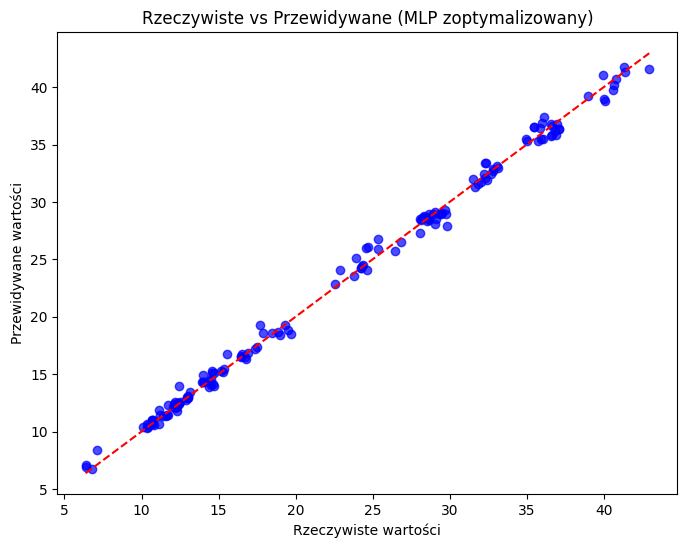

In [ ]:
# MAE dla wszystkich modeli
from sklearn.metrics import mean_absolute_error

print("\nPorównanie MAE:")
print(f"Decision Tree: {mean_absolute_error(y_test, y_pred_dt):.2f}")
print(f"K-Neighbors: {mean_absolute_error(y_test, y_pred_kn):.2f}")
print(f"MLP (bazowy): {mean_absolute_error(y_test, y_pred_mlp_base):.2f}")
print(f"MLP (zoptymalizowany): {mean_absolute_error(y_test, y_pred_mlp_opt):.2f}")

# Wykres rzeczywiste vs przewidywane dla MLP zoptymalizowanego
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_mlp_opt, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Przewidywane wartości")
plt.title("Rzeczywiste vs Przewidywane (MLP zoptymalizowany)")
plt.show()


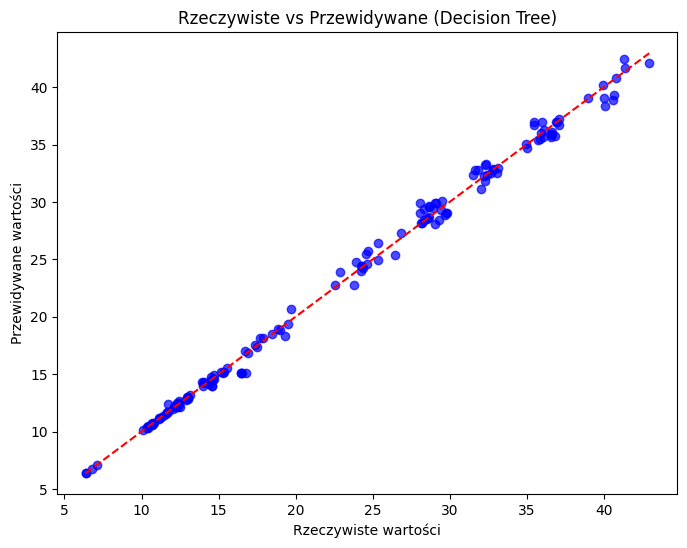

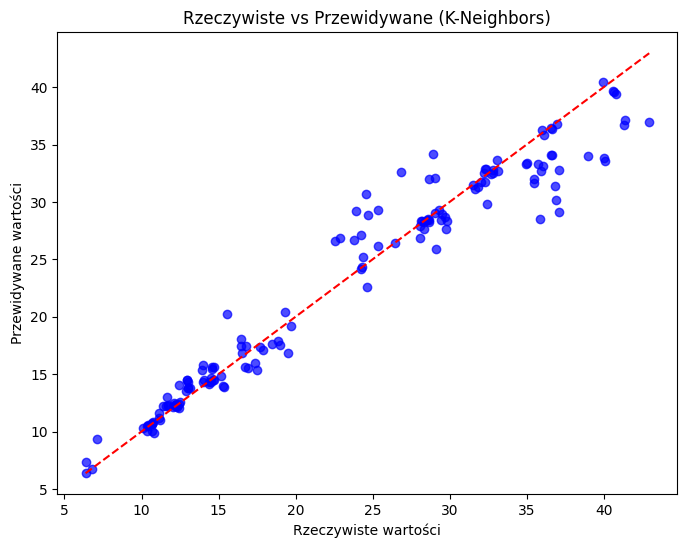

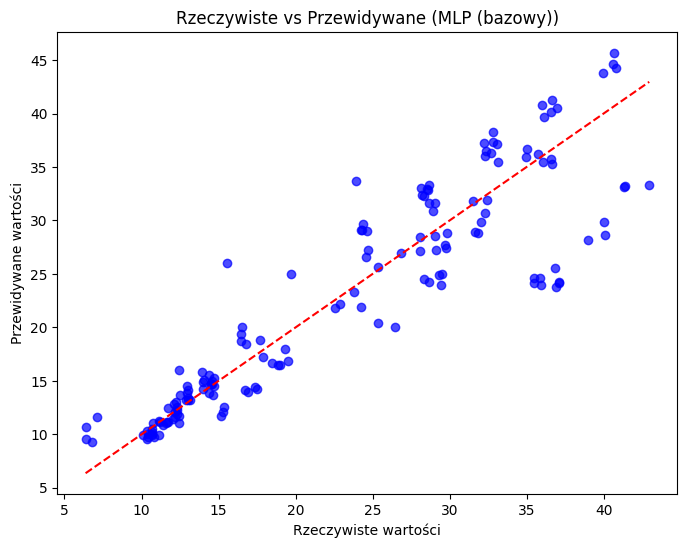

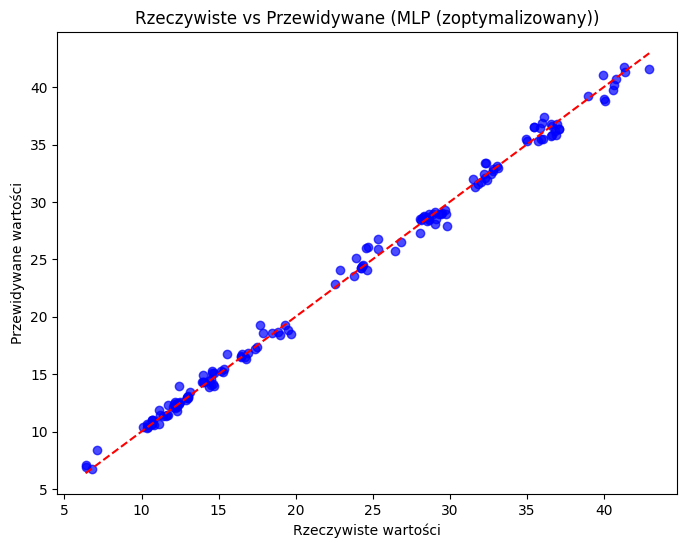

In [ ]:
# Lista modeli i ich przewidywań
models = {
    "Decision Tree": y_pred_dt,
    "K-Neighbors": y_pred_kn,
    "MLP (bazowy)": y_pred_mlp_base,
    "MLP (zoptymalizowany)": y_pred_mlp_opt
}

# Generowanie wykresów
for model_name, y_pred in models.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Rzeczywiste wartości")
    plt.ylabel("Przewidywane wartości")
    plt.title(f"Rzeczywiste vs Przewidywane ({model_name})")
    plt.show()


In [ ]:
input_size = X.shape[1]  # Liczba cech wejściowych
layer_sizes = [128, 64, 32, 1]  # Rozmiary warstw (ostatnia to warstwa wyjściowa)

params_per_layer = []
for i in range(len(layer_sizes)):
    if i == 0:  # Pierwsza warstwa
        params = (input_size * layer_sizes[i]) + layer_sizes[i]
    else:  # Kolejne warstwy
        params = (layer_sizes[i-1] * layer_sizes[i]) + layer_sizes[i]
    params_per_layer.append(params)

for idx, params in enumerate(params_per_layer):
    print(f"Liczba parametrów w warstwie {idx+1}: {params}")


Liczba parametrów w warstwie 1: 1152
Liczba parametrów w warstwie 2: 8256
Liczba parametrów w warstwie 3: 2080
Liczba parametrów w warstwie 4: 33


SGD - zakończono trening.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Adam - zakończono trening.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


RMSprop - zakończono trening.


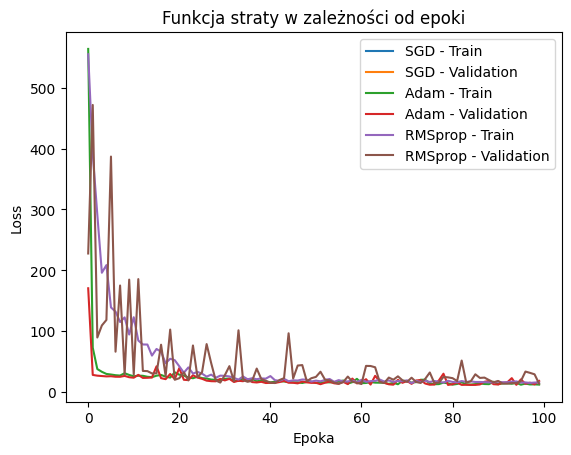

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import History

# Ponowny podział danych dla treningu i walidacji
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Funkcja tworzenia modelu
def build_model(optimizer):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Warstwa wyjściowa
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    return model

optimizers = {
    "SGD": SGD(learning_rate=0.001),
    "Adam": Adam(),
    "RMSprop": RMSprop()
}

history_dict = {}

for name, optimizer in optimizers.items():
    model = build_model(optimizer)
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,  # Możesz zmniejszyć liczbę epok w razie potrzeby
        batch_size=32,
        verbose=0
    )
    history_dict[name] = history
    print(f"{name} - zakończono trening.")

# Analiza wyników
for name, history in history_dict.items():
    plt.plot(history.history['loss'], label=f"{name} - Train")
    plt.plot(history.history['val_loss'], label=f"{name} - Validation")

plt.title("Funkcja straty w zależności od epoki")
plt.xlabel("Epoka")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
for name, history in history_dict.items():
    train_loss = history.history['loss'][-1]
    val_loss = history.history['val_loss'][-1]
    print(f"{name}: Loss - Training: {train_loss:.2f}, Validation: {val_loss:.2f}")


SGD: Loss - Training: nan, Validation: nan
Adam: Loss - Training: 12.06, Validation: 18.09
RMSprop: Loss - Training: 15.42, Validation: 13.56


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for name, history in history_dict.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name}: MSE: {mse:.2f}, MAE: {mae:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
SGD: MSE: 595.41, MAE: 22.34
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Adam: MSE: 595.41, MAE: 22.34
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
RMSprop: MSE: 595.41, MAE: 22.34
